In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error
from xgboost import XGBRegressor
from math import sqrt

train = pd.read_csv('input/train.csv')
test = pd.read_csv('input/test.csv')
sample = pd.read_csv('input/sample_submission.csv')

In [2]:
tmdb = pd.concat([train, test]) 

d:\python\python36\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [3]:
tmdb.dtypes.sort_values()

budget                     int64
id                         int64
runtime                  float64
revenue                  float64
popularity               float64
Keywords                  object
status                    object
spoken_languages          object
release_date              object
production_countries      object
production_companies      object
poster_path               object
overview                  object
original_title            object
original_language         object
imdb_id                   object
homepage                  object
genres                    object
crew                      object
cast                      object
belongs_to_collection     object
tagline                   object
title                     object
dtype: object

In [4]:
tmdb.isnull().sum()[tmdb.isnull().sum()>0]

Keywords                  669
belongs_to_collection    5917
cast                       26
crew                       38
genres                     23
homepage                 5032
overview                   22
poster_path                 2
production_companies      414
production_countries      157
release_date                1
revenue                  4398
runtime                     6
spoken_languages           62
status                      2
tagline                  1460
title                       3
dtype: int64

In [5]:
train.belongs_to_collection = train.belongs_to_collection.fillna("unknow")
test.belongs_to_collection = test.belongs_to_collection.fillna("unknow")

train.genres = train.genres.fillna("unknow")
test.genres = test.genres.fillna("unknow")

train.homepage = train.homepage.fillna("unknow")
test.homepage = test.homepage.fillna("unknow")

train.overview = train.overview.fillna("unknow")
test.overview = test.overview.fillna("unknow")

train.poster_path = train.poster_path.fillna("unknow")
test.poster_path = test.poster_path.fillna("unknow")

train.production_companies = train.production_companies.fillna("unknow")
test.production_companies = test.production_companies.fillna("unknow")

train.production_countries = train.production_countries.fillna("unknow")
test.production_countries = test.production_countries.fillna("unknow")

train.runtime = train.runtime.fillna(train.runtime.mean())
test.runtime = test.runtime.fillna(train.runtime.mean())

train.spoken_languages = train.spoken_languages.fillna("unknow")
test.spoken_languages = test.spoken_languages.fillna("unknow")

train.tagline = train.tagline.fillna("unknow")
test.tagline = test.tagline.fillna("unknow")

train.Keywords = train.Keywords.fillna("unknow")
test.Keywords = test.Keywords.fillna("unknow")

train.cast = train.cast.fillna("unknow")
test.cast = test.cast.fillna("unknow")

train.crew = train.crew.fillna("unknow")
test.crew = test.crew.fillna("unknow")

train.title = train.title.fillna("unknow")
test.title = test.title.fillna("unknow")

train.status = train.status.fillna(train.status.mode())
test.status = test.status.fillna(train.status.mode())

train.release_date = train.release_date.fillna("unknow")
test.release_date = test.release_date.fillna("unknow")

test.release_date[test.release_date=="unknow"] = 0000-00-00

d:\python\python36\lib\site-packages\ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [6]:
train['genres2'] = train.genres.apply(lambda x: x.count('id'))
test['genres2'] = test.genres.apply(lambda x: x.count('id'))

train['cast2'] = train.cast.apply(lambda x: x.count('cast_id'))
test['cast2'] = test.cast.apply(lambda x: x.count('cast_id'))

train['Keywords2'] = train.Keywords.apply(lambda x: x.count('id'))
test['Keywords2'] = test.Keywords.apply(lambda x: x.count('id'))

train['title2'] = train.title.apply(lambda x: len(x))
test['title2'] = test.title.apply(lambda x: len(x))

train['tagline2'] = train.tagline.apply(lambda x: len(x))
test['tagline2'] = test.tagline.apply(lambda x: len(x))

train['spoken_languages2'] = train.spoken_languages.apply(lambda x: x.count('name'))
test['spoken_languages2'] = test.spoken_languages.apply(lambda x: x.count('name'))

train['production_countries2'] = train.production_countries.apply(lambda x: x.count('name'))
test['production_countries2'] = test.production_countries.apply(lambda x: x.count('name'))

train['crew2'] = train.crew.apply(lambda x: x.count('id'))
test['crew2'] = test.crew.apply(lambda x: x.count('id'))

train['overview2'] = train.overview.apply(lambda x: len(x))
test['overview2'] = test.overview.apply(lambda x: len(x))

train['original_title2'] = train.original_title.apply(lambda x: len(x))
test['original_title2'] = test.original_title.apply(lambda x: len(x))

train['homepage2'] = train.homepage.apply(lambda x: 0 if x=='unknow' else 1)
test['homepage2'] = test.homepage.apply(lambda x: 0 if x=='unknow' else 1)

train['belongs_to_collection2'] = train.belongs_to_collection.apply(lambda x: 0 if x=='unknow' else 1)
test['belongs_to_collection2'] = test.belongs_to_collection.apply(lambda x: 0 if x=='unknow' else 1)

train['production_companies2'] = train.production_companies.apply(lambda x: x.count('id'))
test['production_companies2'] = test.production_companies.apply(lambda x: x.count('id'))

In [7]:
train['release_date_year'] = train.release_date.apply(lambda x: pd.to_datetime(x).year)
train['release_date_month'] = train.release_date.apply(lambda x: pd.to_datetime(x).month)
train['release_date_day'] = train.release_date.apply(lambda x: pd.to_datetime(x).day)
train['release_date_weekday'] = train.release_date.apply(lambda x: pd.to_datetime(x).weekday())
test['release_date_year'] = test.release_date.apply(lambda x: pd.to_datetime(x).year)
test['release_date_month'] = test.release_date.apply(lambda x: pd.to_datetime(x).month)
test['release_date_day'] = test.release_date.apply(lambda x: pd.to_datetime(x).day)
test['release_date_weekday'] = test.release_date.apply(lambda x: pd.to_datetime(x).weekday())

In [8]:
train.drop(['id', 'belongs_to_collection', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'spoken_languages' , 'tagline', 'title', 'Keywords', 'cast', 'crew'], axis=1, inplace=True)

test.drop(['id', 'belongs_to_collection', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'spoken_languages' , 'tagline', 'title', 'Keywords', 'cast', 'crew'], axis=1, inplace=True)


tmdb = pd.concat([train, test], sort=False)
tmdb = pd.get_dummies(tmdb)
len_train = len(train)
len_test = len(test)
train = tmdb[:len_train]
test = tmdb[len_train:]

train.revenue = train.revenue.astype('int')

xtrain=train.drop("revenue", axis=1)
ytrain=train['revenue']
xtest=test.drop("revenue", axis=1)

d:\python\python36\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [14]:
train.columns

Index(['budget', 'popularity', 'runtime', 'revenue', 'genres2', 'cast2',
       'Keywords2', 'title2', 'tagline2', 'spoken_languages2',
       'production_countries2', 'crew2', 'overview2', 'original_title2',
       'homepage2', 'belongs_to_collection2', 'production_companies2',
       'release_date_year', 'release_date_month', 'release_date_day',
       'release_date_weekday', 'status_Post Production', 'status_Released',
       'status_Rumored'],
      dtype='object')

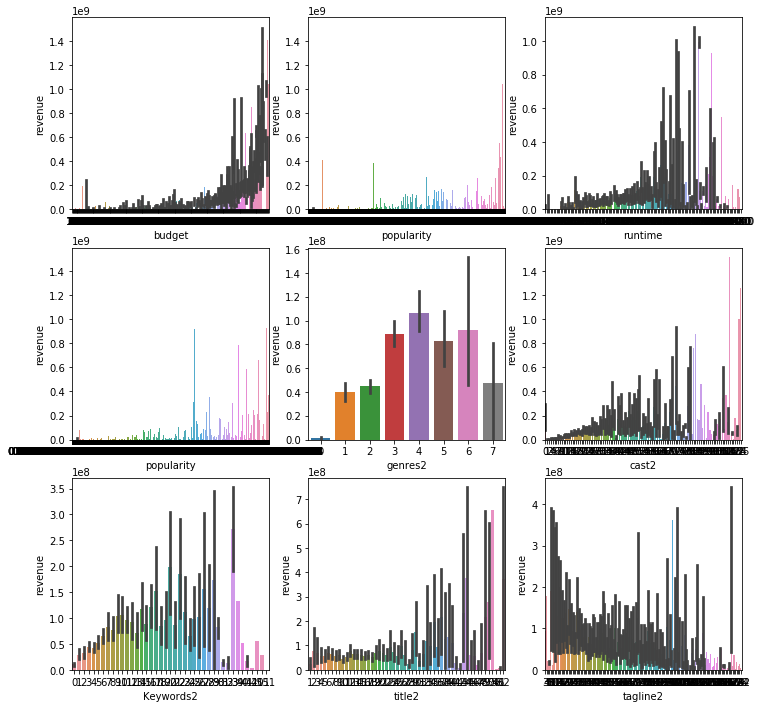

In [18]:
plt.figure(figsize=[12, 12])
plt.subplot(3, 3, 1)
sns.barplot('budget', 'revenue', data=train)
plt.subplot(3, 3, 2)
sns.barplot('popularity', 'revenue', data=train)
plt.subplot(3, 3, 3)
sns.barplot('runtime', 'revenue', data=train)
plt.subplot(3, 3, 4)
sns.barplot('popularity', 'revenue', data=train)
plt.subplot(3, 3, 5)
sns.barplot('genres2', 'revenue', data=train)
plt.subplot(3, 3, 6)
sns.barplot('cast2', 'revenue', data=train)
plt.subplot(3, 3, 7)
sns.barplot('Keywords2', 'revenue', data=train)
plt.subplot(3, 3, 8)
sns.barplot('title2', 'revenue', data=train)
plt.subplot(3, 3, 9)
sns.barplot('tagline2', 'revenue', data=train)

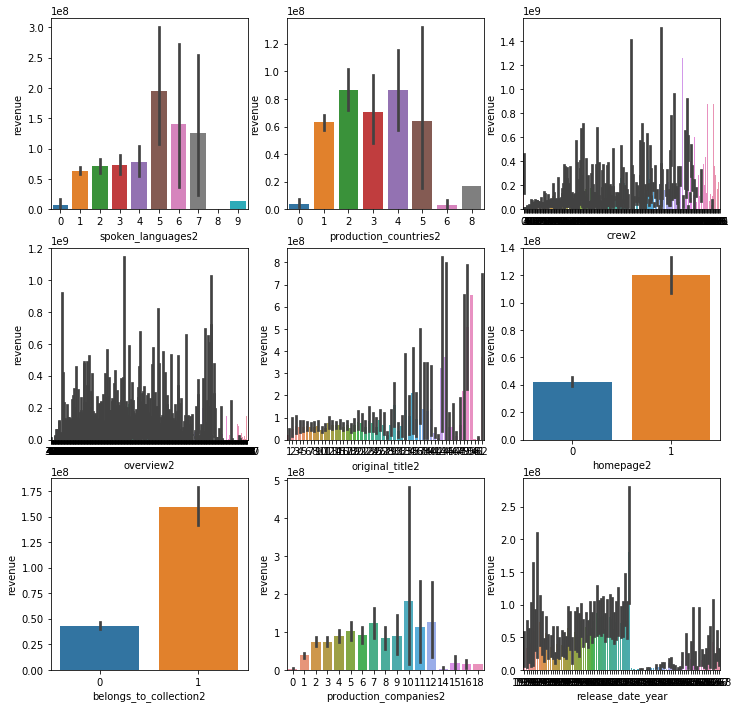

In [20]:
plt.figure(figsize=[12, 12])
plt.subplot(3, 3, 1)
sns.barplot('spoken_languages2', 'revenue', data=train)
plt.subplot(3, 3, 2)
sns.barplot('production_countries2', 'revenue', data=train)
plt.subplot(3, 3, 3)
sns.barplot('crew2', 'revenue', data=train)
plt.subplot(3, 3, 4)
sns.barplot('overview2', 'revenue', data=train)
plt.subplot(3, 3, 5)
sns.barplot('original_title2', 'revenue', data=train)
plt.subplot(3, 3, 6)
sns.barplot('homepage2', 'revenue', data=train)
plt.subplot(3, 3, 7)
sns.barplot('belongs_to_collection2', 'revenue', data=train)
plt.subplot(3, 3, 8)
sns.barplot('production_companies2', 'revenue', data=train)
plt.subplot(3, 3, 9)
sns.barplot('release_date_year', 'revenue', data=train)

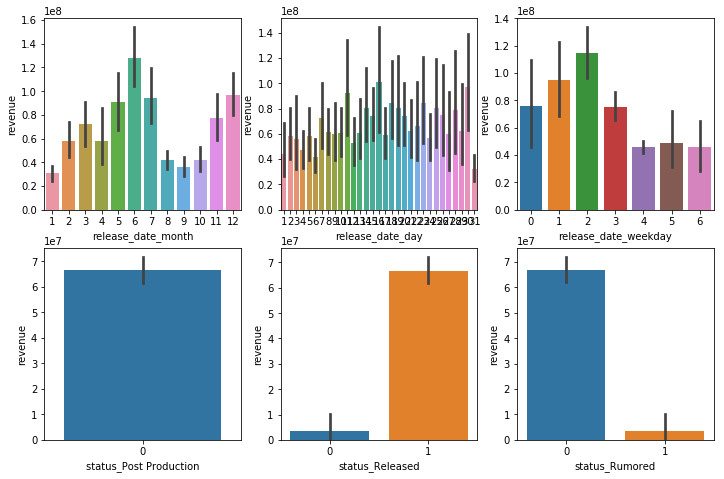

In [21]:
plt.figure(figsize=[12, 12])
plt.subplot(3, 3, 1)
sns.barplot('release_date_month', 'revenue', data=train)
plt.subplot(3, 3, 2)
sns.barplot('release_date_day', 'revenue', data=train)
plt.subplot(3, 3, 3)
sns.barplot('release_date_weekday', 'revenue', data=train)
plt.subplot(3, 3, 4)
sns.barplot('status_Post Production', 'revenue', data=train)
plt.subplot(3, 3, 5)
sns.barplot('status_Released', 'revenue', data=train)
plt.subplot(3, 3, 6)
sns.barplot('status_Rumored', 'revenue', data=train)

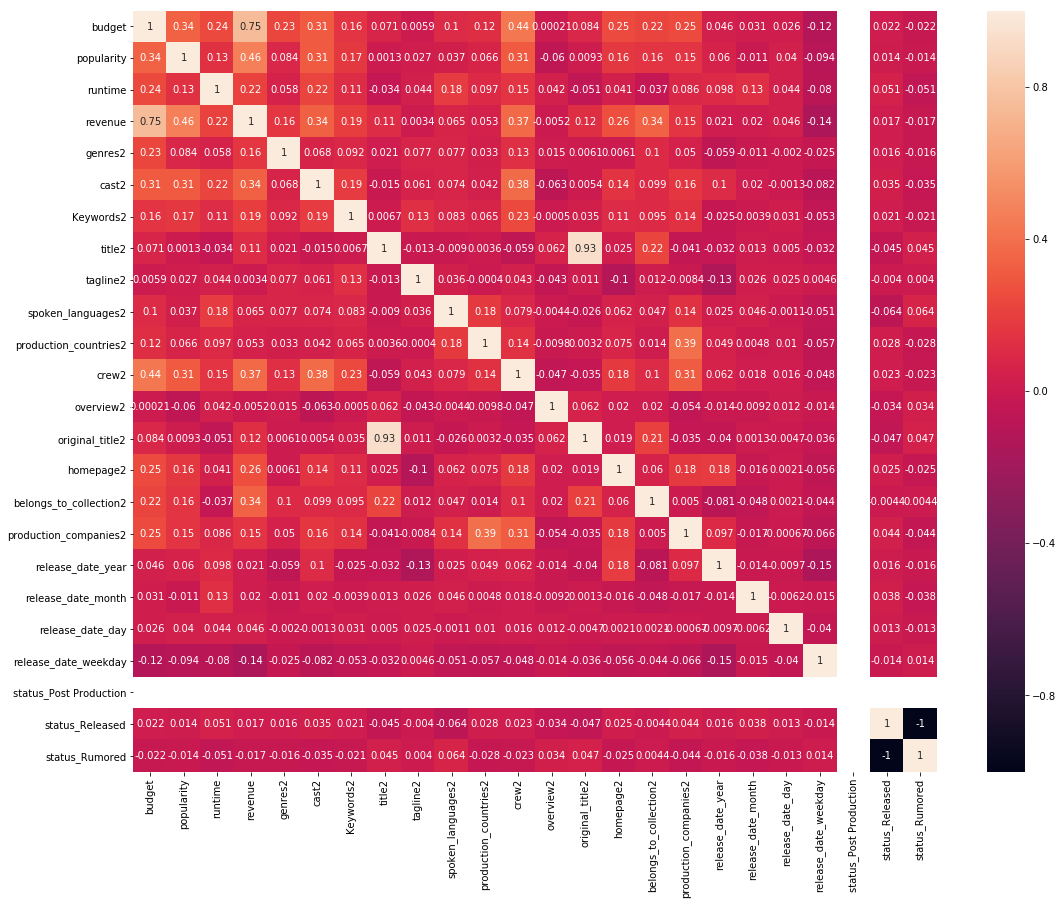

In [9]:
fig = plt.figure(figsize=(18,14))
sns.heatmap(train.corr(), annot=True)

In [10]:
from sklearn import tree
model_tree = tree.DecisionTreeRegressor()

from sklearn import linear_model
model_lr = linear_model.LinearRegression()

from sklearn import svm
model_svr = svm.SVR()

from sklearn import neighbors
model_KN = neighbors.KNeighborsRegressor()

from sklearn import ensemble
model_RandomForestRegressor = ensemble.RandomForestRegressor(n_estimators=20)

from sklearn import ensemble
model_AdaBoostRegressor = ensemble.AdaBoostRegressor(n_estimators=50)

from sklearn import ensemble
model_GradientBoostingRegressor = ensemble.GradientBoostingRegressor(n_estimators=100)

from sklearn.ensemble import BaggingRegressor
model_BaggingRegressor = BaggingRegressor()

from sklearn.tree import ExtraTreeRegressor
model_ExtraTreeRegressor = ExtraTreeRegressor()

def try_model(model):
	model_name = str(model)
	train_X, val_X, train_y, val_y = train_test_split(xtrain, ytrain, random_state=1)
	model.fit(train_X, train_y)
	val_preds = model.predict(val_X)
	val_preds[val_preds<0] = 0
	rmsle = np.sqrt(mean_squared_log_error( val_preds, val_y))
	print("%s - RMSLE: %2f" % (model_name, sqrt(rmsle)))

model_list = [model_tree, model_lr, model_svr, model_KN, model_RandomForestRegressor, 
			  model_AdaBoostRegressor, model_GradientBoostingRegressor, model_BaggingRegressor,
			  model_ExtraTreeRegressor]

for model in model_list:
	try_model(model)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best') - RMSLE: 1.810177
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False) - RMSLE: 2.767681


d:\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False) - RMSLE: 1.720772
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform') - RMSLE: 1.616668
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False) - RMSLE: 1.549074
AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None) - RMSLE: 1.986040
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=

In [12]:
test2 = pd.read_csv('input/test.csv')
model_BaggingRegressor.fit(xtrain, ytrain)
pred = model_BaggingRegressor.predict(xtest)
output = pd.DataFrame({'id': test2.id, 'revenue': pred})
output.to_csv('submission.csv', index=False)